In [16]:
from cont3d import contactmaps
import glob
from polychrom.hdf5_format import HDF5Reporter, list_URIs, load_URI, load_hdf5_file, save_hdf5_file
import polychrom
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
# list of conformation URIs
filenames = sum([list_URIs(i) for i in glob.glob("/net/wiz/home/magus/data/Simulations/carolynSimulations/enhancerPaperToyExample/newSweep4_5*")],[])

In [6]:
filenames = filenames[:1000]

In [80]:
# Making a 500x500x500 contactmap with 50-monomer resolution
# using the first 500 * 50 = 25000 monomers of a conformation

N = 500
resolution = 50

In [25]:
runtimes = pd.DataFrame(columns=('threads', 'N', 'resolution', 'runtime'))

In [9]:
runtimes

,threads,N,resolution,runtime


# Varying number of threads

In [28]:
for n_threads in [1, 2, 4, 8, 16]:
    N = 100
    resolution = 50
    
    def example_contact_finder(data, cutoff=5):
        conts = polychrom.polymer_analyses.calculate_contacts(data[:(N*resolution)], cutoff=5)
        conts = np.unique(conts // resolution, axis=0)
        return conts

    t_start = time.time()
    hmap = contactmaps.triplet_map(N, filenames, n_threads=n_threads, contact_finder=example_contact_finder)
    t_end = time.time()
    
    print(n_threads, t_end - t_start)

    runtimes = runtimes.append({
        'threads': n_threads,
        'N': N,
        'resolution': resolution,
        'runtime': t_end - t_start
    }, ignore_index=True)
            

1 63.87314534187317
2 33.82750749588013
4 16.748308420181274
8 8.687829732894897
16 4.8239617347717285


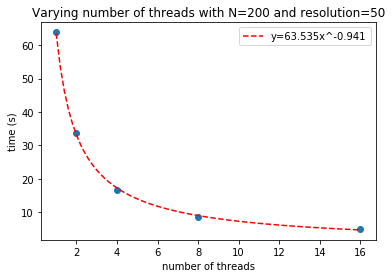

In [106]:
x=runtimes['threads']
y= runtimes['runtime']

plt.figure()
plt.scatter(x,y)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('time (s)')
plt.xlabel('number of threads')
plt.title('Varying number of threads with N=200 and resolution=50')

# trendline
z = np.polyfit(np.log(x),np.log(y), 1)
p = np.poly1d(z)
x_r = np.arange(min(x), max(x)+0.2, 0.2)
plt.plot(x_r, np.exp(p(np.log(x_r))),"r--", label=f"y={np.exp(z[1]):.3f}x^{z[0]:.3f}")
plt.legend()

# Varying N (size of system)

In [95]:
runtimes_2 = pd.DataFrame(columns=('threads', 'N', 'resolution', 'runtime'))
n_threads = 1
resolution = 50

for N in [5, 10, 20, 40, 80, 160, 320, 400, 640, 800]:
    def example_contact_finder(data, cutoff=5):
        conts = polychrom.polymer_analyses.calculate_contacts(data[:(N*resolution)], cutoff=5)
        conts = np.unique(conts // resolution, axis=0)
        return conts

    t_start = time.time()
    hmap = contactmaps.triplet_map(N, filenames, n_threads=n_threads, contact_finder=example_contact_finder)
    t_end = time.time()
    
    print(N, t_end - t_start)

    runtimes_2 = runtimes_2.append({
        'threads': n_threads,
        'N': N,
        'resolution': resolution,
        'runtime': t_end - t_start
    }, ignore_index=True)
            

5 12.071474075317383
10 15.074625492095947
20 19.384100198745728
40 28.799323081970215
80 51.53352093696594
160 101.818110704422
320 186.68736362457275
400 240.84726667404175
640 395.2064628601074


MaybeEncodingError: Error sending result: '[array([[[   0., 1000.,  272., ...,    0.,    0.,    0.],
        [   0.,    0.,  272., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]],

       [[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0., 1000., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]],

       [[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]],

       ...,

       [[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]],

       [[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]],

       [[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,    0.]]])]'. Reason: 'error("'i' format requires -2147483648 <= number <= 2147483647")'

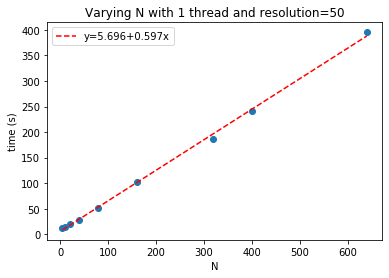

In [115]:
x=runtimes_2['N']
y= runtimes_2['runtime']

plt.figure()
plt.scatter(x,y)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('time (s)')
plt.xlabel('N')
plt.title('Varying N with 1 thread and resolution=50')

# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_r = np.arange(min(x), max(x)+0.2, 0.2)
plt.plot(x_r, p(x_r),"r--", label=f"y={z[1]:.3f}+{z[0]:.3f}x")
plt.legend()

# Varying resolution

In [117]:
runtimes_3 = pd.DataFrame(columns=('threads', 'N', 'resolution', 'runtime'))
n_threads = 1
N = 100

for resolution in [2, 5, 10, 20, 40, 80, 160, 320, 640]:
    def example_contact_finder(data, cutoff=5):
        conts = polychrom.polymer_analyses.calculate_contacts(data[:(N*resolution)], cutoff=5)
        conts = np.unique(conts // resolution, axis=0)
        return conts

    t_start = time.time()
    hmap = contactmaps.triplet_map(N, filenames, n_threads=n_threads, contact_finder=example_contact_finder)
    t_end = time.time()
    
    print(resolution, t_end - t_start)

    runtimes_3 = runtimes_3.append({
        'threads': n_threads,
        'N': N,
        'resolution': resolution,
        'runtime': t_end - t_start
    }, ignore_index=True)
            

2 12.79926347732544
5 15.598424434661865
10 19.603994369506836
20 28.81319284439087
40 50.560911417007446
80 104.66836833953857
160 192.90374445915222
320 398.5614631175995
640 393.2491617202759


Text(0.5, 1.0, 'Varying N with 1 thread and resolution=50')

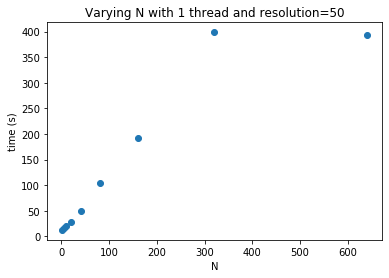

In [121]:
x=runtimes_3['resolution']
y= runtimes_3['runtime']

plt.figure()
plt.scatter(x,y)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('time (s)')
plt.xlabel('N')
plt.title('Varying resolution with 1 thread and N=100')

# # trendline
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# x_r = np.arange(min(x), max(x)+0.2, 0.2)
# plt.plot(x_r, p(x_r),"r--", label=f"y={z[1]:.3f}+{z[0]:.3f}x")
# plt.legend()

# Varying cutoff

In [125]:
from importlib import reload

In [132]:
reload(contactmaps)

<module 'cont3d.contactmaps' from '/home/neil/notebooks/cont3d/cont3d/contactmaps.py'>

In [140]:
runtimes_4 = pd.DataFrame(columns=('cutoff', 'threads', 'N', 'resolution', 'runtime'))
n_threads = 1
N = 100
resolution = 20

for cutoff in [1, 2, 3, 4, 5, 6, 7, 8, 12, 16, 24]:
    def example_contact_finder(data, cutoff=5):
        conts = polychrom.polymer_analyses.calculate_contacts(data[:(N*resolution)], cutoff=cutoff)
        conts = np.unique(conts // resolution, axis=0)
        return conts

    t_start = time.time()
    hmap = contactmaps.triplet_map(N, filenames, n_threads=n_threads, contact_finder=example_contact_finder, cutoff=cutoff)
    t_end = time.time()
    
    print(cutoff, t_end - t_start)

    runtimes_4 = runtimes_4.append({
        'cutoff': cutoff,
        'threads': n_threads,
        'N': N,
        'resolution': resolution,
        'runtime': t_end - t_start
    }, ignore_index=True)
            

1 12.288677453994751
2 15.596540212631226
3 18.612714529037476
4 22.611475229263306
5 29.118147373199463
6 36.53285264968872
7 46.54573631286621
8 59.36210870742798
12 131.19700241088867
16 228.8588457107544
24 516.885735988617


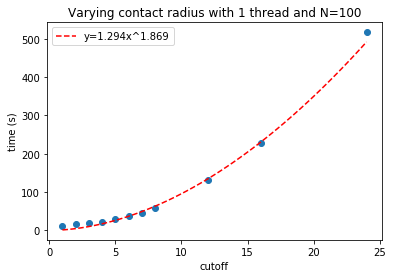

In [148]:
x=runtimes_4['cutoff']
y= runtimes_4['runtime']

plt.figure()
plt.scatter(x,y)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('time (s)')
plt.xlabel('cutoff')
plt.title('Varying contact radius with 1 thread and N=100')

# trendline
z = np.polyfit(np.log(x)[4:],np.log(y)[4:], 1)
p = np.poly1d(z)
x_r = np.arange(min(x), max(x)+0.2, 0.2)
plt.plot(x_r, np.exp(p(np.log(x_r))),"r--", label=f"y={np.exp(z[1]):.3f}x^{z[0]:.3f}")
plt.legend()